In [9]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import f1_score, confusion_matrix
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from bayes_opt import BayesianOptimization
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [ ]:
Loading of sequences and calulated descriptors

In [2]:
# Connect to the database and read the data
con = sqlite3.connect("unified_final.db")
df = pd.read_sql_query("SELECT * FROM prod_desc", con)
df["AB"] = df["AB"].apply(lambda x: int.from_bytes(x, "little"))
columns_to_drop = ["index", "id", "name", "description", "OX", "source", "valid", "level_0"]
df = df.drop(columns=columns_to_drop)
df



,AB,seq,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,GLFNVFKGLKTAGKHVAGSLLNQLKCKVSGGC,14.846797,14.846797,0.087071,-2.002090,0.018429,14.803493,3275.947,3029.995,...,0,0,0,0,0,0,0,0,5,0
1,0,GDAAAQPEK,13.893681,13.893681,0.012597,-1.565587,0.032554,16.661290,885.930,826.458,...,0,0,0,0,0,0,0,0,1,0
2,0,NNQLNASHK,13.796414,13.796414,0.021054,-1.815311,0.028080,14.708333,1025.092,956.548,...,0,0,0,0,0,0,0,0,1,0
3,0,GDVVANPESVELK,14.237243,14.237243,0.017602,-1.930895,0.025233,16.294737,1356.497,1258.721,...,0,0,0,0,0,0,0,0,1,0
4,0,GSTTAESAALR,13.406438,13.406438,0.042400,-1.873375,0.016162,15.851351,1063.134,988.542,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,0,ADVVTYENKKGNVTFDHKAHAEKLGCDACHEGTPAKIAIDKKSAHK...,15.189385,15.189385,0.003454,-2.274403,0.012431,15.867327,7262.295,6764.343,...,0,0,0,0,0,0,0,0,12,0
11517,0,MAYKIADSCVSCGACASECPVNAISQGDSIFVIDADTCIDCGNCAN...,15.124280,15.124280,0.000332,-2.327630,0.021597,16.670130,5630.439,5259.495,...,1,0,0,0,0,0,0,0,1,0
11518,0,MAYVINEACISCGACEPECPVNAISSGDDRYVIDADTCIDCGACAG...,15.204259,15.204259,0.007641,-2.433559,0.012654,16.938144,5670.460,5299.516,...,1,0,0,0,0,0,0,0,1,0
11519,0,MGYSVIVDSDKCIGCGECVDVCPVEVYELQNGKAVPVNEEECLGCE...,15.305484,15.305484,0.001055,-2.255417,0.021597,16.122402,6313.251,5887.875,...,1,0,0,0,0,0,0,0,2,0


In [3]:
# split of data to target
X = df.drop(columns=['AB',"seq"])
y = df['AB']




In [6]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle = True)

pipeline set up

In [7]:
from sklearn.decomposition import KernelPCA

# Define the pipeline components
scaler = MinMaxScaler()
kpca = KernelPCA()
svc = SVC(probability=True)

# Define the pipeline
pipeline = make_pipeline(scaler, kpca, svc)

bayesian optimization for hyperparameter tuning for kernel choice, number of components and gamma for kernel PCA, and C, gamma and kernel choice for SVM 

In [15]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification


from bayes_opt import BayesianOptimization





# Kernel mapping
kernel_map = {0: 'linear', 1: 'poly', 2: 'rbf', 3: 'sigmoid'}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Bayesian Optimization function
def optimize_svm(kpca_n_components, kpca_gamma, kpca_kernel, svc_C, svc_gamma, svc_kernel):
    kpca_kernel = kernel_map[int(kpca_kernel)]
    svc_kernel = kernel_map[int(svc_kernel)]
    pipeline.set_params(
        kernelpca__n_components=int(kpca_n_components),
        kernelpca__gamma=kpca_gamma,
        kernelpca__kernel=kpca_kernel,
        svc__C=svc_C,
        svc__gamma=svc_gamma,
        svc__kernel=svc_kernel
    )
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1, verbose=4)
    return cv_scores.mean()

# Define the parameter bounds for optimization
pbounds = {
    'kpca_n_components': (1, 20),  # Adjust based on your data and needs
    'kpca_gamma': (1e-3, 1e-1),
    'kpca_kernel': (0, 3),  # Use integers to represent the kernel types
    'svc_C': (1e1, 1e2),
    'svc_gamma': (1e-2, 1e-1),
    'svc_kernel': (0, 3)  # Use integers to represent the kernel types
}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(
    f=optimize_svm,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=2, n_iter=25)

# Get the best parameters
best_params = optimizer.max['params']
best_params['kpca_kernel'] = kernel_map[int(best_params['kpca_kernel'])]
best_params['svc_kernel'] = kernel_map[int(best_params['svc_kernel'])]
print("Best Hyperparameters:", best_params)

# Update the pipeline with the best parameters
pipeline.set_params(
    kernelpca__n_components=int(best_params['kpca_n_components']),
    kernelpca__gamma=best_params['kpca_gamma'],
    kernelpca__kernel=best_params['kpca_kernel'],
    svc__C=best_params['svc_C'],
    svc__gamma=best_params['svc_gamma'],
    svc__kernel=best_params['svc_kernel']
)



|   iter    |  target   | kpca_g... | kpca_k... | kpca_n... |   svc_C   | svc_gamma | svc_ke... |
-------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.3min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


| 1         | 0.6654    | 0.03808   | 2.852     | 14.91     | 63.88     | 0.02404   | 0.468     |


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.6min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.1min finished


| 2         | 0.6606    | 0.00675   | 2.599     | 12.42     | 73.73     | 0.01185   | 2.91      |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.6min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.3min finished


| 3         | 0.6647    | 0.03454   | 2.856     | 15.02     | 63.77     | 0.08928   | 0.1488    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.8min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.5min finished


| 4         | 0.6655    | 0.05483   | 2.646     | 14.1      | 64.72     | 0.01083   | 2.092     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.8min remaining: 10.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.9min finished


| 5         | 0.7452    | 0.07689   | 1.628     | 16.23     | 64.16     | 0.0236    | 2.301     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.4min finished


| 6         | 0.7396    | 0.09346   | 1.022     | 17.22     | 64.05     | 0.01      | 2.827     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.2min finished


| 7         | 0.7602    | 0.08908   | 0.9198    | 17.54     | 66.09     | 0.04489   | 2.119     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.5min remaining:  9.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.4min finished


| 8         | 0.542     | 0.001     | 3.0       | 18.87     | 66.26     | 0.01      | 2.574     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.1min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.7min finished


| 9         | 0.7278    | 0.1       | 0.0       | 16.36     | 65.42     | 0.07746   | 1.845     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.7min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.9min finished


| 10        | 0.5588    | 0.1       | 0.0       | 18.29     | 65.17     | 0.01      | 1.123     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.0min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


| 11        | 0.7719    | 0.1       | 1.146     | 16.64     | 65.51     | 0.05101   | 2.727     |


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.1min remaining: 10.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


| 12        | 0.7616    | 0.05663   | 0.9634    | 16.18     | 67.12     | 0.06231   | 2.868     |


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.4min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.3min finished


| 13        | 0.6682    | 0.07871   | 1.503     | 15.87     | 67.05     | 0.03907   | 1.501     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


| 14        | 0.7534    | 0.08719   | 0.4088    | 15.12     | 66.2      | 0.05091   | 2.877     |


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.4min remaining: 12.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.1min finished


| 15        | 0.7394    | 0.04576   | 0.1476    | 17.35     | 67.88     | 0.01466   | 2.827     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.9min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.8min finished


| 16        | 0.5535    | 0.0986    | 0.008683  | 15.33     | 64.04     | 0.1       | 3.0       |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


| 17        | 0.6318    | 0.1       | 0.1031    | 16.84     | 66.38     | 0.01      | 3.0       |


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.2min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.1min finished


| 18        | 0.6997    | 0.01696   | 1.511     | 17.25     | 65.01     | 0.04889   | 2.691     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.3min remaining: 10.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


| 19        | 0.769     | 0.08683   | 1.039     | 16.4      | 65.36     | 0.05762   | 2.134     |


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.2min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.2min finished


| 20        | 0.7518    | 0.07633   | 1.335     | 15.09     | 65.83     | 0.03018   | 2.898     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.5min remaining: 12.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.1min finished


| 21        | 0.7585    | 0.05283   | 1.729     | 16.75     | 67.1      | 0.07323   | 2.951     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.0min remaining: 12.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.0min finished


| 22        | 0.6878    | 0.03052   | 1.29      | 16.61     | 66.34     | 0.01506   | 2.148     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.2min remaining: 10.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.3min finished


| 23        | 0.5425    | 0.05146   | 1.192     | 16.61     | 67.99     | 0.1       | 3.0       |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.4min remaining: 14.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.4min finished


| 24        | 0.736     | 0.09633   | 0.6449    | 15.99     | 65.39     | 0.01972   | 2.523     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.6min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.0min finished


| 25        | 0.7284    | 0.08754   | 1.284     | 15.76     | 65.89     | 0.01065   | 2.23      |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


| 26        | 0.7145    | 0.007484  | 0.9544    | 9.227     | 99.88     | 0.01579   | 2.089     |


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


| 27        | 0.5407    | 0.05387   | 1.419     | 1.4       | 62.07     | 0.06666   | 1.896     |
Best Hyperparameters: {'kpca_gamma': 0.1, 'kpca_kernel': 'poly', 'kpca_n_components': 16.642455318237722, 'svc_C': 65.50617615328638, 'svc_gamma': 0.0510067487925185, 'svc_kernel': 'rbf'}


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kernelpca',
                 KernelPCA(gamma=0.1, kernel='poly', n_components=16)),
                ('svc',
                 SVC(C=65.50617615328638, gamma=0.0510067487925185,
                     probability=True))])

Best Hyperparameters: {'C': 37.454637344617396, 'gamma': 0.09507635921035062, 'kernel': 'rbf'}

Training model with tuned hyperparameter, learning curve, ROC curve, classification matrix, F1-score and accuracy

[learning_curve] Training set sizes: [ 737 1474 2211 2948 3686 4423 5160 5897 6634 7372]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed: 10.4min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 30.8min finished


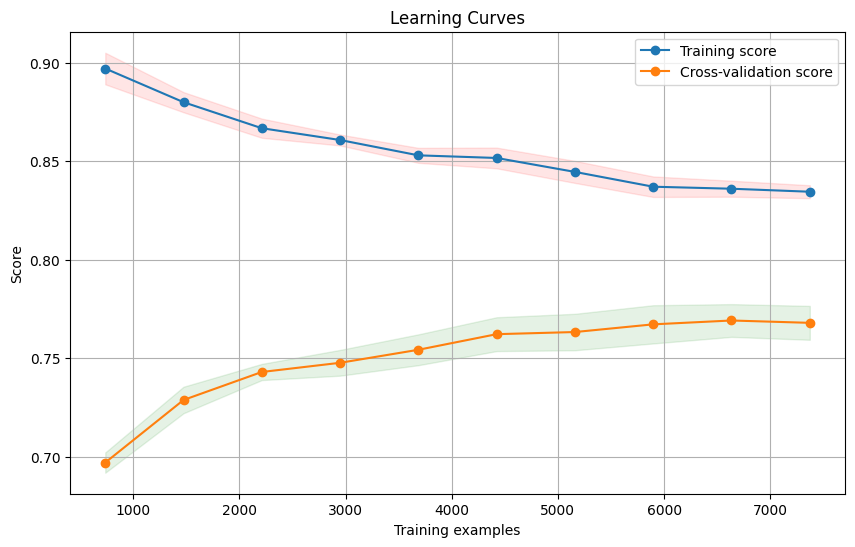

Test Accuracy: 0.7883
F1 score: 0.8040
Confusion Matrix:
[[ 816  228]
 [ 260 1001]]


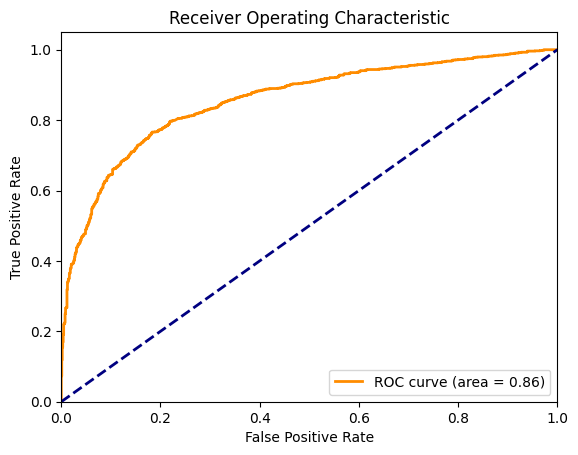

In [16]:
from sklearn.model_selection import learning_curve, KFold, cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# Initialise KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=2)

# Compute learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Vary the training set sizes
    cv=kf,  # Cross-validation strategy
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPUs
    verbose = 2
)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.fill_between(train_sizes, 
                 np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.mean(valid_scores, axis=1) - np.std(valid_scores, axis=1),
                 np.mean(valid_scores, axis=1) + np.std(valid_scores, axis=1), 
                 alpha=0.1, color='g')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Train the model on the entire training set for final evaluation
pipeline.fit(X_train, y_train)

# Predictions for test set using trained model
y_pred = pipeline.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate predicted probabilities
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


misclassified sequences analysis; take indices and identify sequences

In [17]:
#take only sequences
df = df["seq"]

# Identify indices of falsely classified instances
false_indices = np.where(y_test != y_pred)[0]

# Select corresponding rows from the original DataFrame 'df'
false_classified_df = df.iloc[false_indices]

In [ ]:
Get amino acid composition

In [24]:
import pandas as pd
from propy import PyPro
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm



# List of feature extraction methods
feature_methods = [
    'GetAAComp'
    
]

# Function to extract features
def extract_features(sequence):
    descriptor = PyPro.GetProDes(sequence)
    
    features = {}
    
    # Extract features using each method
    for method in feature_methods:
        try:
            feature = getattr(descriptor, method)()
            features.update(feature)
        except AttributeError:
            print(f"AttributeError: Method '{method}' not available for sequence '{sequence}'")
    
    return features

# Function to apply feature extraction with multithreading and tqdm progress bar
def extract_features_multithreaded(peptides, max_workers=4):
    features_list = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_sequence = {executor.submit(extract_features, seq): seq for seq in peptides}
        
        # Initialize tqdm progress bar
        with tqdm(total=len(future_to_sequence), desc="Extracting Features") as pbar:
            for future in as_completed(future_to_sequence):
                seq = future_to_sequence[future]
                try:
                    features = future.result()
                    features_list.append(features)
                except Exception as e:
                    print(f"Exception for sequence {seq}: {e}")
                finally:
                    pbar.update(1)  # Update progress bar

    return features_list

# Extract features using multithreading
features_list = extract_features_multithreaded(false_classified_df)

# Create a DataFrame from the list of feature dictionaries
features_df = pd.DataFrame(features_list)

# Combine the original DataFrame with the features DataFrame
aa_df = pd.concat([false_classified_df, features_df], axis=1)



Extracting Features: 100%|███████████████████████████████████████████████████████| 488/488 [00:00<00:00, 162898.56it/s]


In [ ]:
Get doublet amino acid composition

In [25]:
import pandas as pd
from propy import PyPro
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm



# List of feature extraction methods
feature_methods = [
    
    'GetDPComp',
    
    
]

# Function to extract features
def extract_features(sequence):
    descriptor = PyPro.GetProDes(sequence)
    
    features = {}
    
    # Extract features using each method
    for method in feature_methods:
        try:
            feature = getattr(descriptor, method)()
            features.update(feature)
        except AttributeError:
            print(f"AttributeError: Method '{method}' not available for sequence '{sequence}'")
    
    return features

# Function to apply feature extraction with multithreading and tqdm progress bar
def extract_features_multithreaded(peptides, max_workers=4):
    features_list = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_sequence = {executor.submit(extract_features, seq): seq for seq in peptides}
        
        # Initialize tqdm progress bar
        with tqdm(total=len(future_to_sequence), desc="Extracting Features") as pbar:
            for future in as_completed(future_to_sequence):
                seq = future_to_sequence[future]
                try:
                    features = future.result()
                    features_list.append(features)
                except Exception as e:
                    print(f"Exception for sequence {seq}: {e}")
                finally:
                    pbar.update(1)  # Update progress bar

    return features_list

# Extract features using multithreading
features_list = extract_features_multithreaded(false_classified_df)

# Create a DataFrame from the list of feature dictionaries
features_df = pd.DataFrame(features_list)

# Combine the original DataFrame with the features DataFrame
dp_df = pd.concat([false_classified_df, features_df], axis=1)







Extracting Features: 100%|█████████████████████████████████████████████████████████| 488/488 [00:00<00:00, 1245.15it/s]


In [ ]:
Get triplet amino acid composition

In [26]:
import pandas as pd
from propy import PyPro
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm



# List of feature extraction methods
feature_methods = [
    
    'GetTPComp'
    
]

# Function to extract features
def extract_features(sequence):
    descriptor = PyPro.GetProDes(sequence)
    
    features = {}
    
    # Extract features using each method
    for method in feature_methods:
        try:
            feature = getattr(descriptor, method)()
            features.update(feature)
        except AttributeError:
            print(f"AttributeError: Method '{method}' not available for sequence '{sequence}'")
    
    return features

# Function to apply feature extraction with multithreading and tqdm progress bar
def extract_features_multithreaded(peptides, max_workers=4):
    features_list = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_sequence = {executor.submit(extract_features, seq): seq for seq in peptides}
        
        # Initialize tqdm progress bar
        with tqdm(total=len(future_to_sequence), desc="Extracting Features") as pbar:
            for future in as_completed(future_to_sequence):
                seq = future_to_sequence[future]
                try:
                    features = future.result()
                    features_list.append(features)
                except Exception as e:
                    print(f"Exception for sequence {seq}: {e}")
                finally:
                    pbar.update(1)  # Update progress bar

    return features_list

# Extract features using multithreading
features_list = extract_features_multithreaded(false_classified_df)

# Create a DataFrame from the list of feature dictionaries
features_df = pd.DataFrame(features_list)

# Combine the original DataFrame with the features DataFrame
tp_df = pd.concat([false_classified_df, features_df], axis=1)



Extracting Features: 100%|███████████████████████████████████████████████████████████| 488/488 [02:30<00:00,  3.25it/s]


In [ ]:
combine and show which are most frequent

In [28]:
# Assuming df1, df2, and df3 are your DataFrames
datasets = [aa_df, dp_df, tp_df]

# Iterate over each dataset
for idx, df in enumerate(datasets, start=1):
    column_sums = df.iloc[:, 1:].sum()  # Calculate the sum of values in each column excluding the first column
    highest_sums = column_sums.nlargest(3)  # Get the top 3 columns with the highest sums
    print(f"Top columns in dataset {idx}:")
    print(highest_sums)


Top columns in dataset 1:
K    4206.247
L    4180.670
G    4102.838
dtype: float64
Top columns in dataset 2:
KK    583.54
LL    473.57
LK    471.32
dtype: float64
Top columns in dataset 3:
AKK    28.0
PRP    23.0
LKK    22.0
dtype: float64


In [32]:
# Save to CSV
false_classified_df.to_csv('false_classified_kpca.csv', index=True)